In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import datetime, seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_excel('Preprocessed Data.xlsx')

In [4]:
data = pd.DataFrame(df)

In [5]:
data.drop(columns=['amenities'], axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21088\3770431784.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


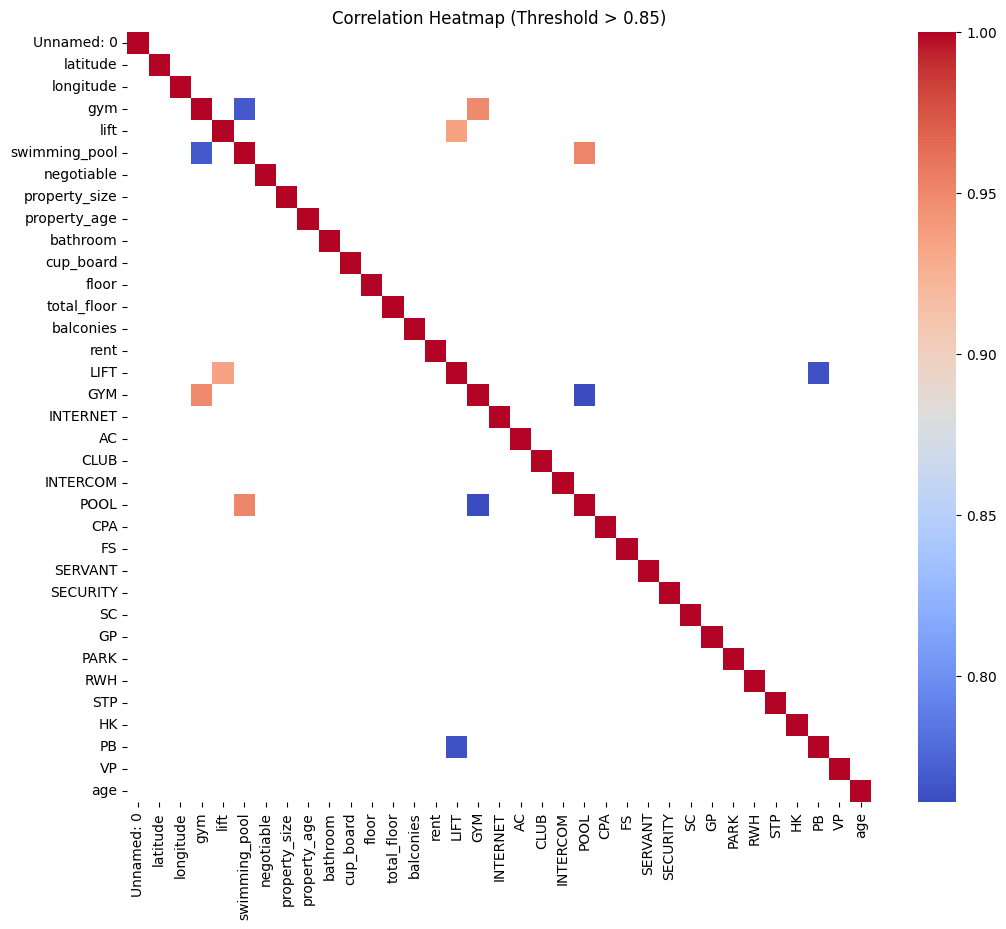

In [6]:
correlation_matrix = data.corr()
# Filter correlation values based on the threshold
threshold = 0.75
filtered_corr_matrix = correlation_matrix[abs(correlation_matrix) > threshold]

# Create a new figure and plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap (Threshold > 0.85)")

plt.show() 

In [7]:
correlation_matrix['rent'].sort_values(ascending=False)

rent             1.000000
bathroom         0.677390
property_size    0.588315
LIFT             0.490032
PB               0.483128
balconies        0.472221
lift             0.461437
POOL             0.453851
GYM              0.448649
total_floor      0.436968
swimming_pool    0.434263
gym              0.431120
CLUB             0.427005
SECURITY         0.412161
FS               0.410886
INTERCOM         0.396101
CPA              0.339661
VP               0.318468
HK               0.307470
floor            0.306242
RWH              0.286969
STP              0.274494
AC               0.235029
GP               0.224291
SERVANT          0.204210
longitude        0.163755
PARK             0.140769
negotiable       0.062429
latitude         0.032829
Unnamed: 0       0.004846
age              0.001375
cup_board       -0.001245
SC              -0.009572
property_age    -0.010619
INTERNET        -0.021140
Name: rent, dtype: float64

In [8]:
data.drop(columns=['lift','gym','swimming_pool'],inplace=True)

In [9]:
data.drop(columns=['cup_board','SC','property_age','INTERNET', 'age'], inplace=True)

In [10]:
data.columns

Index(['Unnamed: 0', 'id', 'type', 'locality', 'activation_date', 'latitude',
       'longitude', 'lease_type', 'negotiable', 'furnishing', 'parking',
       'property_size', 'bathroom', 'facing', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent', 'LIFT', 'GYM',
       'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY',
       'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'],
      dtype='object')

In [11]:
data['type'].value_counts()

BHK2        11705
BHK3         4388
BHK1         3613
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

In [12]:
dict= {'bhk2':'BHK2', 'bhk3':'BHK3', '1BHK1':'BHK1'}
data['type'] = data['type'].replace(dict)

In [13]:
data['lease_type'].value_counts()

FAMILY      10213
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: lease_type, dtype: int64

In [14]:
data['furnishing'].value_counts()

SEMI_FURNISHED     17950
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: furnishing, dtype: int64

In [15]:
for coln in [ 'parking', 'property_size', 'bathroom', 'facing', 'floor',
       'total_floor', 'water_supply', 'building_type', 'balconies', 'rent',
       'LIFT', 'GYM', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT',
       'SECURITY', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'] :
    print(f"{coln}     :      {data[coln].value_counts()}")

parking     :      BOTH            10841
TWO_WHEELER      7224
FOUR_WHEELER     1448
NONE             1042
Name: parking, dtype: int64
property_size     :      1200    1784
600     1456
1000    1304
800     1086
1100     897
        ... 
1628       1
1051       1
948        1
1913       1
415        1
Name: property_size, Length: 1141, dtype: int64
bathroom     :      2     11321
1      6262
3      2647
4       287
5        33
6         3
21        1
7         1
Name: bathroom, dtype: int64
facing     :      E     9557
N     5925
W     2632
S     1219
NE     817
SE     197
NW     149
SW      59
Name: facing, dtype: int64
floor     :      1     5908
0     4987
2     4545
3     2593
4     1193
5      297
6      205
7      187
9      132
8      121
10     103
11      86
12      58
14      44
13      31
15      23
16      17
17       9
19       6
18       5
20       3
25       1
22       1
Name: floor, dtype: int64
total_floor     :      2     4857
4     4835
3     4691
1     2110
5     14

### Here I removed all the rows where bathroom no is 21.. Obviously who the hell has 21 bathrooms in their apartment !! We are not Ambanis !!

In [16]:
data = data[data['bathroom'] != 21]

### Same 10 & 13 balconies !!

In [17]:
data = data[~data['balconies'].isin([10,13])]

In [18]:
data['floor'].corr(data['total_floor'])

0.7103357951476765

In [19]:
data[['total_floor','rent']].groupby(['total_floor']).mean()

,rent
total_floor,
0,18850.685950
1,17615.780569
2,15630.155684
3,16917.314206
4,19935.443640
5,21258.256875
6,23846.226415
7,27888.369048
8,28591.530055


<Axes: xlabel='floor', ylabel='total_floor'>

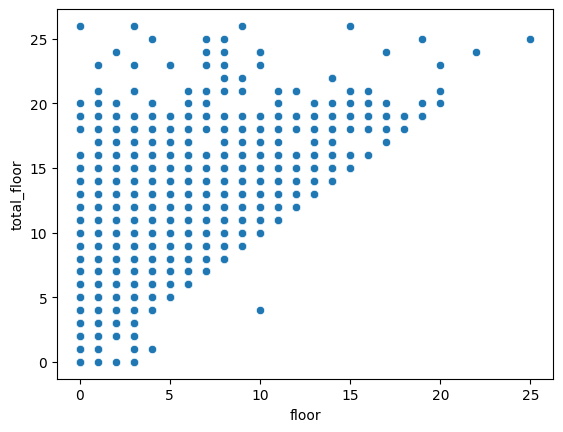

In [20]:
sns.scatterplot(x=data['floor'], y=data['total_floor'])

### Floor number can never be higher that number of total floor !!

In [21]:
(data['floor'] > data['total_floor']).sum()

9

In [22]:
data = data[data['floor'] <= data['total_floor']]

In [23]:
data.drop(columns= 'id', inplace=True)

In [24]:
data.drop(columns= 'activation_date', inplace=True)

In [25]:
label = LabelEncoder()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20542 entries, 0 to 20554
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     20542 non-null  int64  
 1   type           20542 non-null  object 
 2   locality       20542 non-null  object 
 3   latitude       20542 non-null  float64
 4   longitude      20542 non-null  float64
 5   lease_type     20542 non-null  object 
 6   negotiable     20542 non-null  int64  
 7   furnishing     20542 non-null  object 
 8   parking        20542 non-null  object 
 9   property_size  20542 non-null  int64  
 10  bathroom       20542 non-null  int64  
 11  facing         20542 non-null  object 
 12  floor          20542 non-null  int64  
 13  total_floor    20542 non-null  int64  
 14  water_supply   20542 non-null  object 
 15  building_type  20542 non-null  object 
 16  balconies      20542 non-null  int64  
 17  rent           20542 non-null  int64  
 18  LIFT  

In [27]:
for colm in data.select_dtypes(include='object') :
    data[colm] = label.fit_transform(data[colm]) + 1

In [28]:
for co in data.select_dtypes(include='int32') :
    data[co] = data[co].astype('int64')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20542 entries, 0 to 20554
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     20542 non-null  int64  
 1   type           20542 non-null  int64  
 2   locality       20542 non-null  int64  
 3   latitude       20542 non-null  float64
 4   longitude      20542 non-null  float64
 5   lease_type     20542 non-null  int64  
 6   negotiable     20542 non-null  int64  
 7   furnishing     20542 non-null  int64  
 8   parking        20542 non-null  int64  
 9   property_size  20542 non-null  int64  
 10  bathroom       20542 non-null  int64  
 11  facing         20542 non-null  int64  
 12  floor          20542 non-null  int64  
 13  total_floor    20542 non-null  int64  
 14  water_supply   20542 non-null  int64  
 15  building_type  20542 non-null  int64  
 16  balconies      20542 non-null  int64  
 17  rent           20542 non-null  int64  
 18  LIFT  

In [30]:
data.to_excel('Final Preprocssed Data.xlsx')